In [14]:
import numpy as np
import maze_minotaur_func as mz
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0,  0,  1,  0,  0,  0,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  1,  1],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  1,  1,  1,  1,  1,  1,  0],
    [ 0,  0,  0,  0,  1,  2,  0,  0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

In [16]:
def getProbability(horizon, start, policy, method, iteration):
    data_dict = dict()
    data_dict[str(horizon)] = 0
    data_dict[str(horizon + 1)] = 0
    for n in range(iteration):
        path = env.simulate(start, policy, method)
        # print("length is:", len(path_can))
        if len(path) < horizon and str(len(path)) not in data_dict.keys():
            data_dict[str(len(path))] = 1
        elif len(path) < horizon:
            data_dict[str(len(path))] += 1
        else:
            if path[horizon - 1][2] == start[2] and path[horizon - 1][3] == start[3]:
                data_dict[str(horizon)] += 1
            else:
                data_dict[str(horizon + 1)] += 1
    return data_dict


def figplot(data, name, horizon, iteration):
    data = dict(sorted(data.items(), key=lambda item: item[0]))
    l = list(data.values())
    values_sum = [l[0]]
    for i in range(1, len(l)):
        values_sum.append(l[i] + values_sum[i - 1])
    new_key = 'T +'
    old_key = str(horizon + 1)
    data[new_key] = data.pop(old_key)
    df = pd.DataFrame({"horizon": data.keys(), "values": values_sum})
    df['values'] = df['values'] / iteration
    plt.figure(figsize=(8, 6))
    splot = plt.scatter(x="horizon", y="values", data=df)
    plt.xlabel("T", size=16)
    plt.ylabel("Probability of exiting the maze (" + str(iteration) + " episodes)", size=14)
    plt.title(name, size=16)
    plt.savefig(name + '.png')
    plt.show()

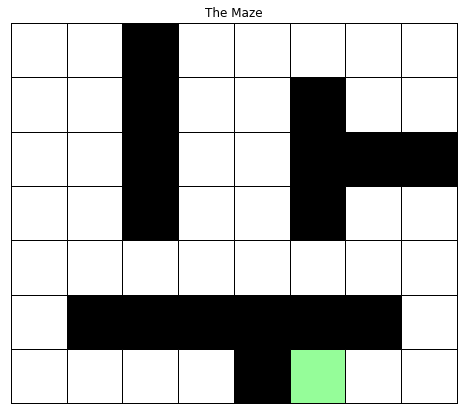

In [17]:
mz.draw_maze(maze)
start = (0, 0, 6, 5)

In [18]:
# Dynamic Programming
horizon = 20
method = 'DynProg'
iteration = 10000

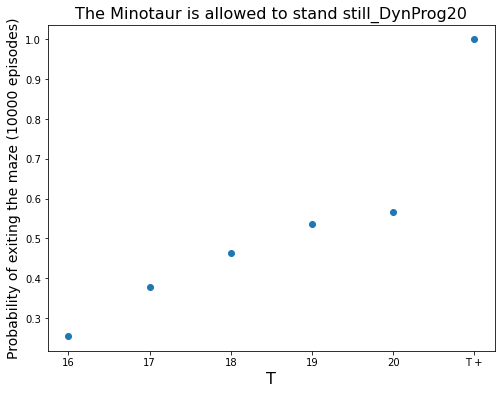

In [19]:
minotaur_still_flag = True
env = mz.Maze(maze, minotaur_still_flag)
V, policy = mz.dynamic_programming(env, horizon)
start_state = env.map[start]
name = 'The Minotaur is allowed to stand still_' + method + str(horizon)
can = getProbability(horizon, start, policy, method, iteration)
figplot(can, name, horizon, iteration)

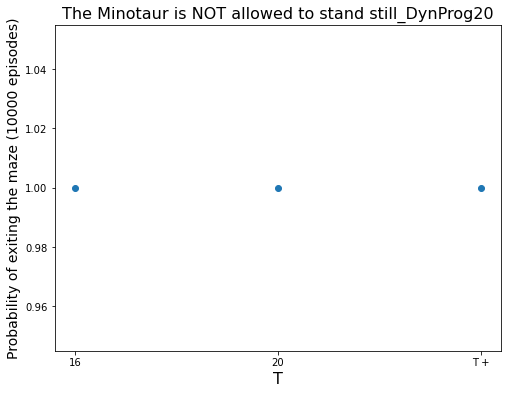

In [20]:
minotaur_still_flag = False
env = mz.Maze(maze, minotaur_still_flag)
V, policy = mz.dynamic_programming(env, horizon)
start_state = env.map[start]
name = "The Minotaur is NOT allowed to stand still_" + method + str(horizon)
cant = getProbability(horizon, start, policy, method, iteration)
figplot(cant, name, horizon, iteration)

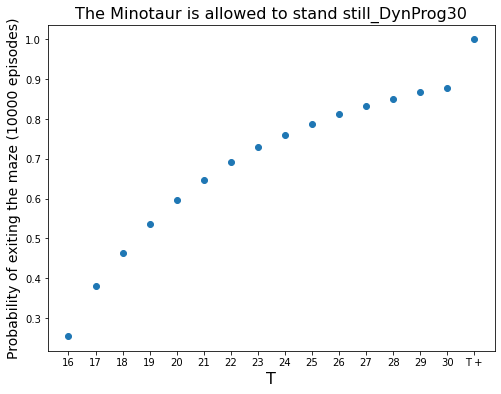

In [21]:
horizon = 30
minotaur_still_flag = True
env = mz.Maze(maze, minotaur_still_flag)
V, policy = mz.dynamic_programming(env, horizon)
start_state = env.map[start]
name = 'The Minotaur is allowed to stand still_' + method + str(horizon)
can = getProbability(horizon, start, policy, method, iteration)
figplot(can, name, horizon, iteration)

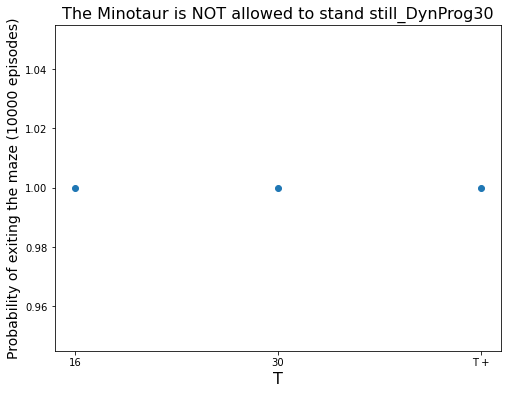

In [22]:
minotaur_still_flag = False
env = mz.Maze(maze, minotaur_still_flag)
V, policy = mz.dynamic_programming(env, horizon)
start_state = env.map[start]
name = "The Minotaur is NOT allowed to stand still_" + method + str(horizon)
cant = getProbability(horizon, start, policy, method, iteration)
figplot(cant, name, horizon, iteration)

In [23]:
# Value Iteration
method = 'ValIter'
gamma = 29 / 30
epsilon = 0.0001
horizon = 30
iteration = 10000

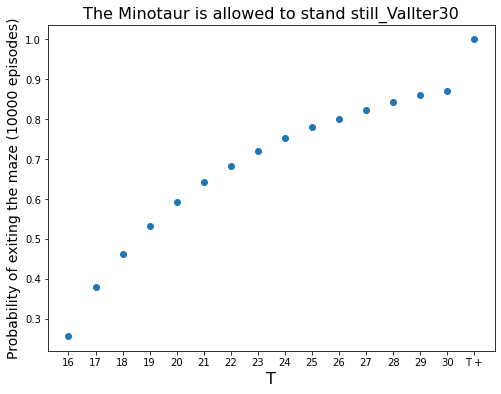

In [24]:
minotaur_still_flag = True
env = mz.Maze(maze, minotaur_still_flag)
V, policy = mz.value_iteration(env, gamma, epsilon)
start_state = env.map[start]
name = 'The Minotaur is allowed to stand still_' + method + str(horizon)
can = getProbability(horizon, start, policy, method, iteration)
figplot(can, name, horizon, iteration)

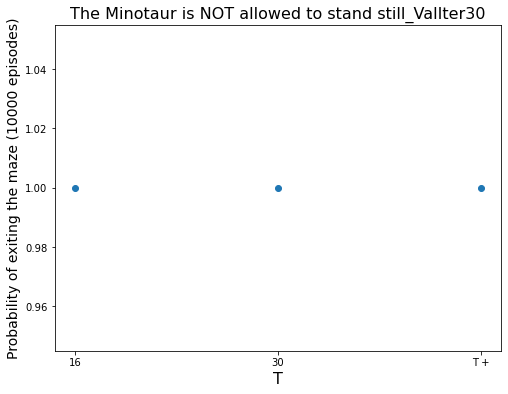

In [25]:
minotaur_still_flag = False
env = mz.Maze(maze, minotaur_still_flag)
V, policy = mz.value_iteration(env, gamma, epsilon)
start_state = env.map[start]
name = "The Minotaur is NOT allowed to stand still_" + method + str(horizon)
cant = getProbability(horizon, start, policy, method, iteration)
figplot(cant, name, horizon, iteration)